### Import the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

### Importing the Data

In [2]:
raw_data = pd.read_csv("Index2018.csv")

In [3]:
df = raw_data.copy()

### Examining the Data

In [4]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
date      6269 non-null object
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


**Date -> Date,
  spx -> S&P 500 USA Market index,
  dax -> Dax 30 Germany Market index,
  ftse -> FTSE 100 UK Market Index,
  nikkei -> NIKKEI Japan 225 Market Index**

In [6]:
df.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [7]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [8]:
df.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Plotting the Data

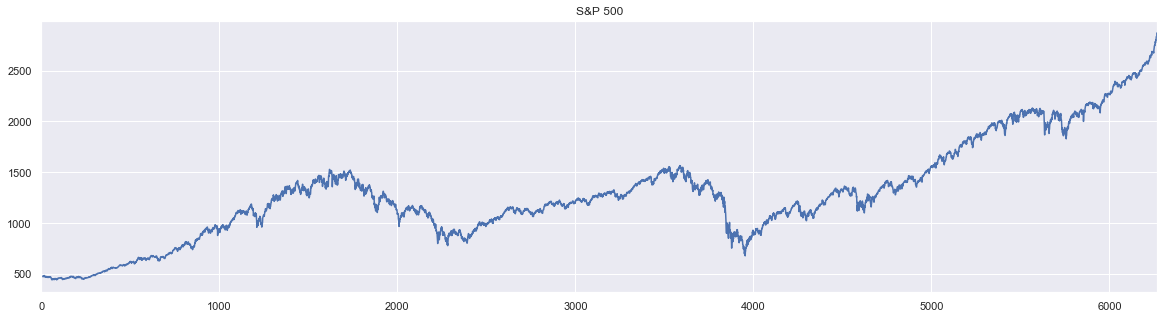

In [9]:
df.spx.plot(figsize=(20,5),title="S&P 500")

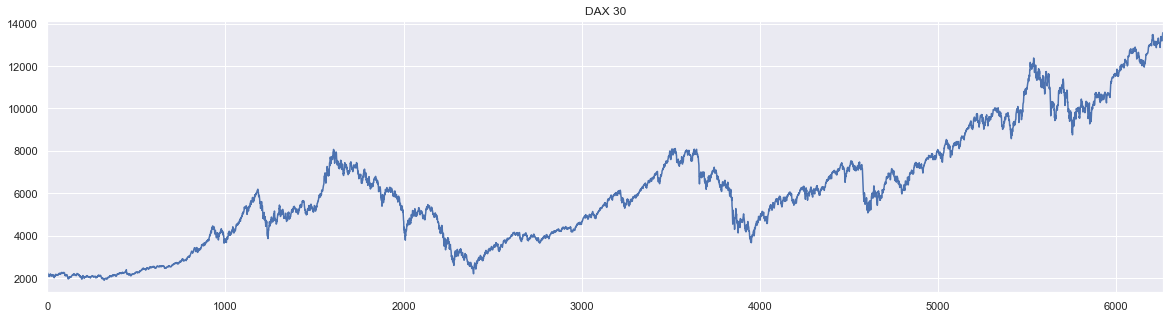

In [10]:
df.dax.plot(figsize=(20,5),title="DAX 30")

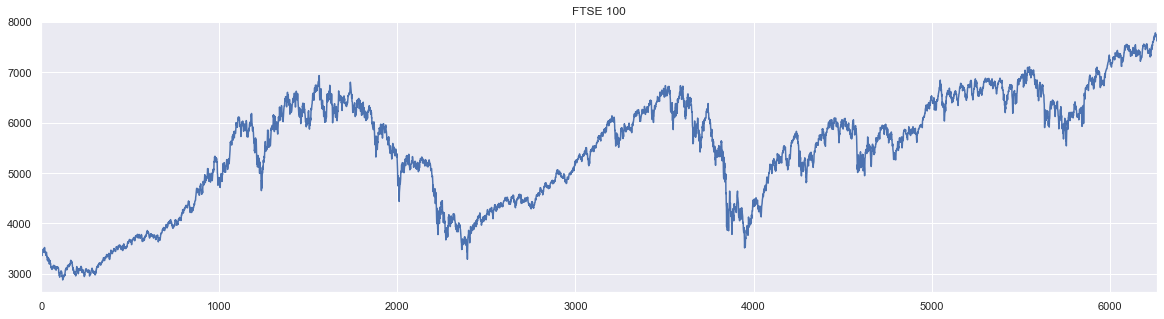

In [11]:
df.ftse.plot(figsize=(20,5),title="FTSE 100")

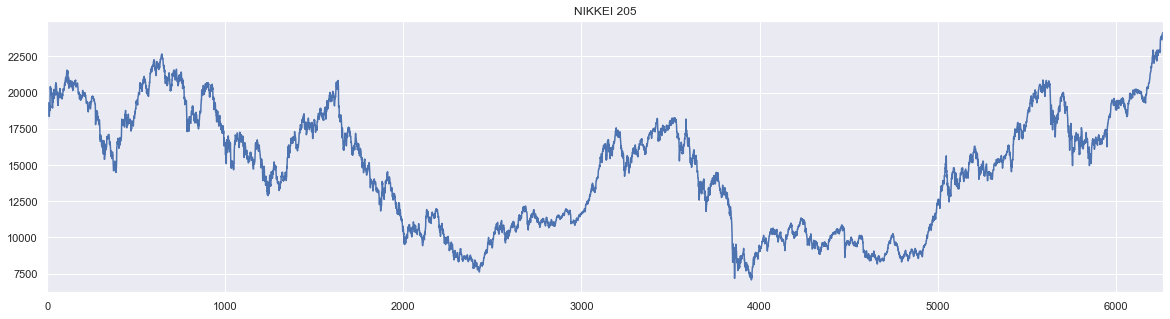

In [12]:
df.nikkei.plot(figsize=(20,5),title="NIKKEI 205")

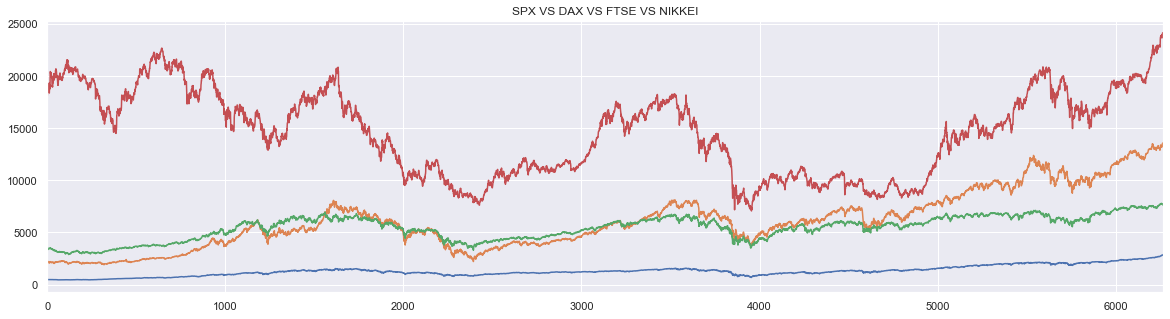

In [13]:
plt.figure(figsize=(20,5))
df.spx.plot()
df.dax.plot()
df.ftse.plot()
df.nikkei.plot()
plt.title("SPX VS DAX VS FTSE VS NIKKEI")
plt.show()

### The QQ Plot

In [14]:
import scipy.stats
import pylab

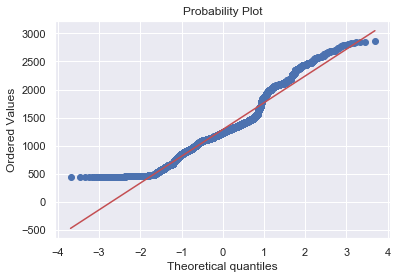

In [15]:
scipy.stats.probplot(df.spx,plot=pylab)
pylab.show()

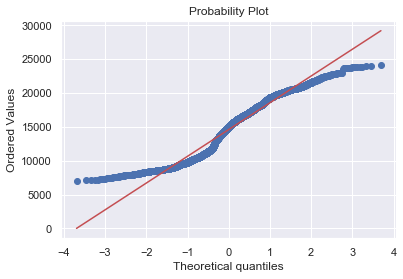

In [16]:
scipy.stats.probplot(df.nikkei,plot=pylab)
pylab.show()

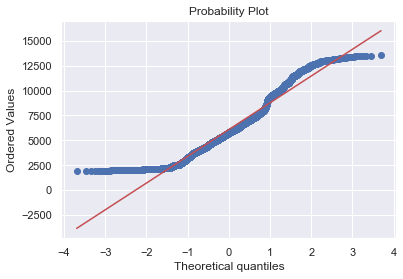

In [17]:
scipy.stats.probplot(df.dax,plot=pylab)
pylab.show()

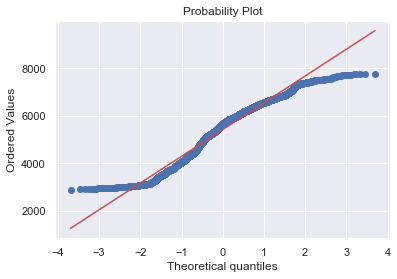

In [18]:
scipy.stats.probplot(df.ftse,plot=pylab)
pylab.show()

### Convert date to datetime

In [19]:
df.date = pd.to_datetime(df.date,dayfirst=True)

In [20]:
print(df.date.dtypes)

datetime64[ns]


### Check the time period

In [21]:
df.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [22]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting up date as index

In [23]:
df.set_index("date",inplace=True)

In [24]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting up frequency

In [25]:
df = df.asfreq('b')

In [26]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [27]:
df.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

### Fill the missing values

In [28]:
# Fill the missing value to the last known value of this collumn
df.spx = df.spx.fillna(method="ffill")
df.dax = df.dax.fillna(method="ffill")
df.ftse = df.ftse.fillna(method="ffill")
df.nikkei = df.nikkei.fillna(method="ffill")

In [29]:
df.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

### Simplify the data

In [30]:
# Lets create a column for market value of ftse
df["market_value"]=df.spx

In [31]:
df.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [32]:
### Lets remove the collumn except market_value
del df["spx"],df["dax"],df["ftse"],df["nikkei"]

In [33]:
df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### Spliting data train and test

In [34]:
size = int(len(df)*.80)

In [35]:
train = df.iloc[:size] # 80% of train data

In [36]:
test = df.iloc[size:] # 20% of test data

In [37]:
train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [38]:
test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### White Noise

In [39]:
wn = np.random.normal(loc=train.market_value.mean(),scale=train.market_value.std(),size=len(train))

In [40]:
# Lets add column in the train data set
train["wn"] = wn

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1094.085142
std,292.559287,291.648009
min,438.920000,75.911404
25%,914.620000,899.870212
50%,1144.650000,1087.213217
75%,1316.280729,1289.301860
max,1570.252238,2177.114752


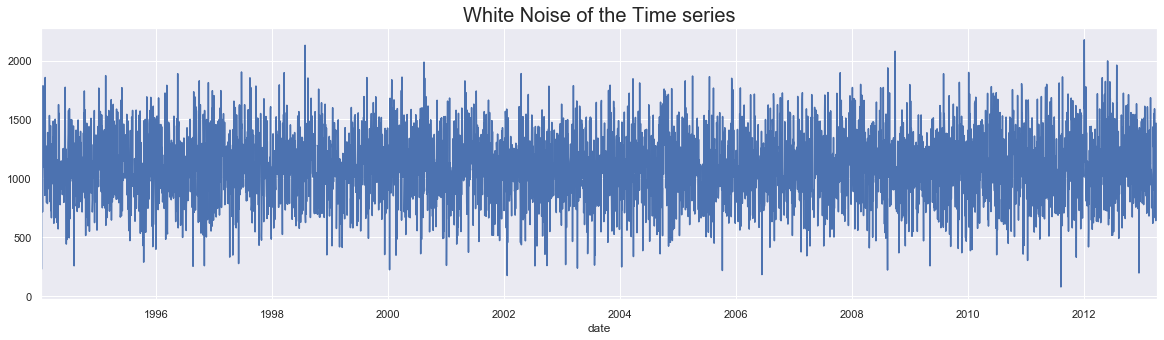

In [42]:
# Plot the white noise
train.wn.plot(figsize=(20,5))
plt.title("White Noise of the Time series",size=20)
plt.show()

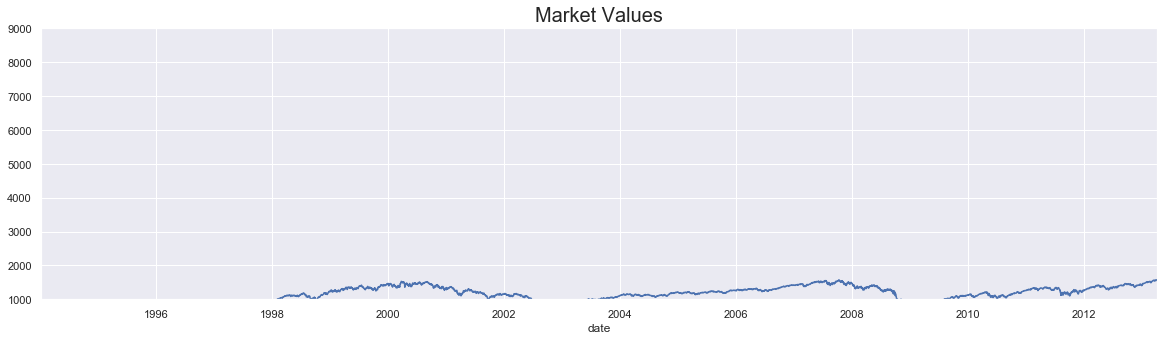

In [43]:
# Plot the market value
train.market_value.plot(figsize=(20,5))
plt.title("Market Values",size=20)
plt.ylim(1000,9025) # Scale as the same of white noise
plt.show()

### Random Walk

In [44]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date,dayfirst=True)
rw.set_index("date",inplace=True)
rw = rw.asfreq("b")

In [45]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [46]:
train["rw"]=rw.price

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
train.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1275.344838,1122.139662
1994-01-10,475.27,226.561957,1080.347860
1994-01-11,474.13,1076.647513,1082.095245
1994-01-12,474.17,1170.925952,1083.639265
1994-01-13,472.47,1124.204227,1067.146255


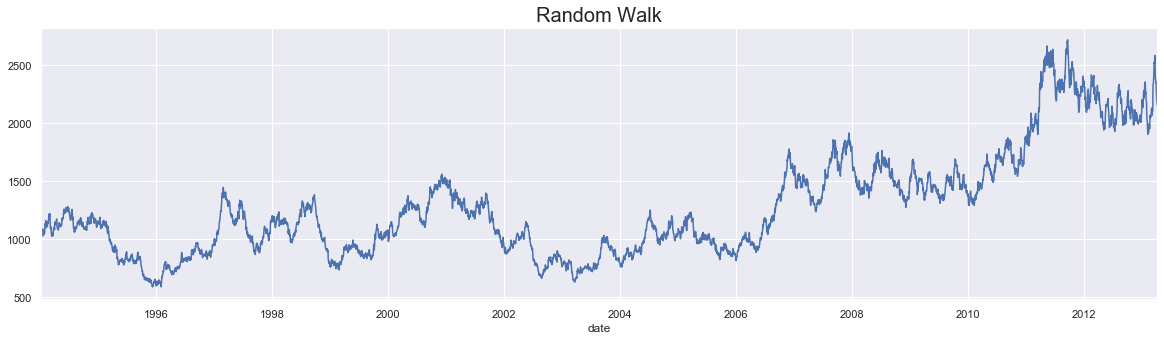

In [48]:
# Plot the Random walk
train.rw.plot(figsize=(20,5))
plt.title("Random Walk",size=20)
plt.show()

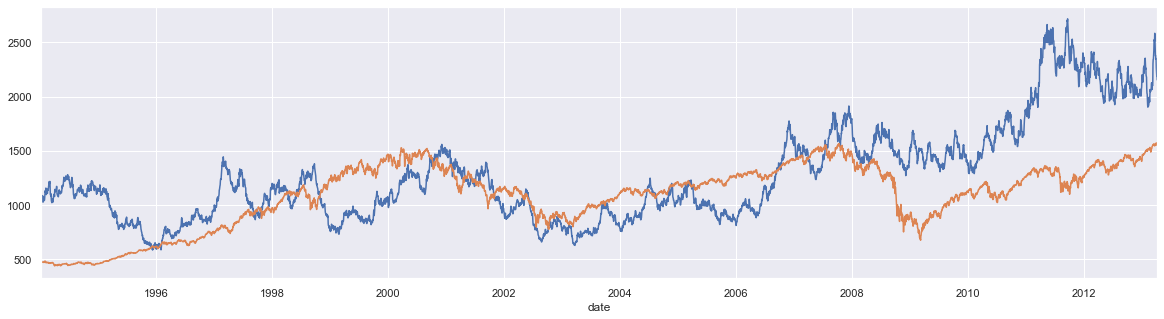

In [49]:
# Lets plot rw and market_value together
plt.figure(figsize=(20,5))
train.rw.plot()
train.market_value.plot()
plt.show()

### Stationarity

In [50]:
# Import necessary package
import statsmodels.tsa.stattools as sts

In [51]:
# Dicky-Fuller test for market value
sts.adfuller(train.market_value)

(-1.7369847452352423,
 0.41216456967706283,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

**Critical value of dicky-fuller test : -1.7369847452352423,   P-value associated with t-stats :  0.41216456967706283,  Number of lags used regression : 18,   Number of observation used in the analysis : 5002**


In [52]:
# Dicky-Fuller test for White Noise
sts.adfuller(train.wn)

(-69.95153019569806,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70776.08403246825)

In [53]:
# Dicky-Fuller test for random walk
sts.adfuller(train.rw)

(-1.3286073927689714,
 0.6159849181617386,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Seasonility

In [54]:
# Import package
from statsmodels.tsa.seasonal import seasonal_decompose

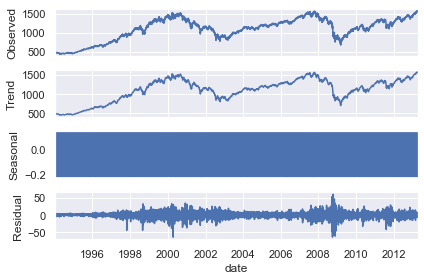

In [55]:
# Additive seasonal decompose of market value
s_dec_additive = seasonal_decompose(train.market_value,model="additive")

# Lets plot this
s_dec_additive.plot()
plt.show()

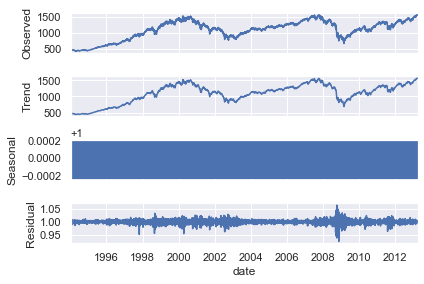

In [56]:
# Multiplicative seasonal decompose of market value
s_dec_multiplicative = seasonal_decompose(train.market_value,model="multiplicative")

# Lets plot this
s_dec_multiplicative.plot()
plt.show()

**Both decomposition seasonal sequence has no clear pattern and Trend closely represents as observed series So, There is no Seasonality among S&P**

### ACF (Autocorrelation Function)

In [57]:
# Import package
import statsmodels.graphics.tsaplots as sgt

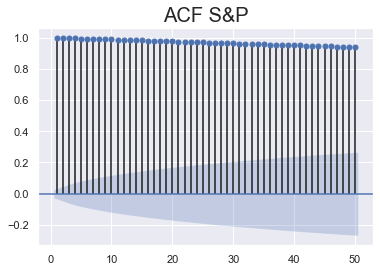

In [58]:
# ACF plot for market value
sgt.plot_acf(train.market_value,lags=50,unbiased=True,zero=False)
plt.title("ACF S&P",size=20)
plt.show()

**We see that there Autocorrelation of S&P price. Because in every lag there correlation with the previous lags**

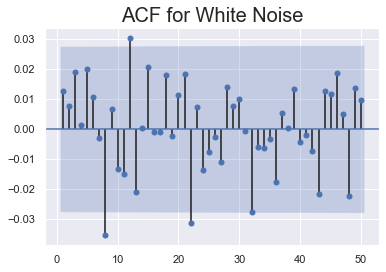

In [59]:
# ACF plot for White Noise
sgt.plot_acf(train.wn,lags=50,unbiased=True,zero=False)
plt.title("ACF for White Noise",size=20)
plt.show()

**No Autocorrelation of White Noise**

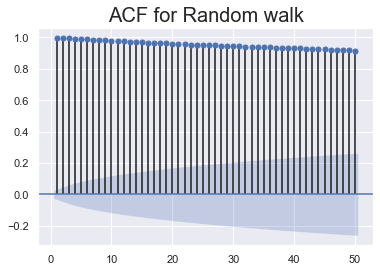

In [60]:
# ACF plot for Random Walk
sgt.plot_acf(train.rw,lags=50,unbiased=True,zero=False)
plt.title("ACF for Random walk",size=20)
plt.show()

**There ACF in Random walk**

### PACF(Partial AutoCorrelation Function)

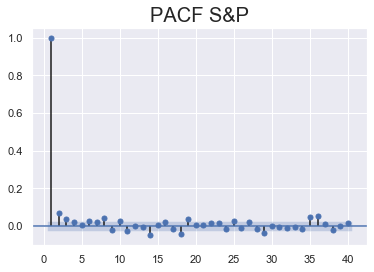

In [61]:
# PACF plot for Market value
sgt.plot_pacf(train.market_value,lags=40,zero=False,method=("ols"))
plt.title("PACF S&P",size=20)
plt.show()

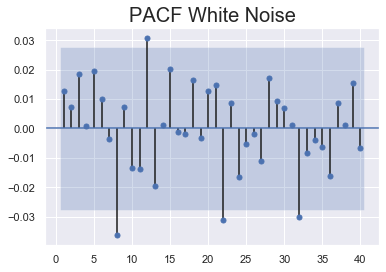

In [62]:
# PACF plot for White Noise
sgt.plot_pacf(train.wn,lags=40,zero=False,method=("ols"))
plt.title("PACF White Noise",size=20)
plt.show()

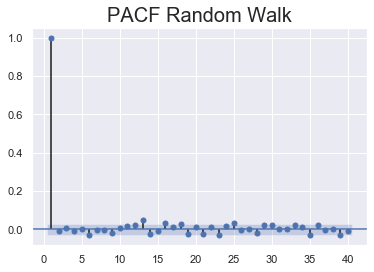

In [63]:
# PACF plot for Random Walk
sgt.plot_pacf(train.rw,lags=40,zero=False,method=("ols"))
plt.title("PACF Random Walk",size=20)
plt.show()

# Model Building

### Data Preprocessing

In [64]:
df_c=raw_data.copy() # Copy data set
df_c.date = pd.to_datetime(df_c.date, dayfirst = True) # Convert date column object to DateTime
df_c.set_index("date", inplace=True) # Take data set into time series, set index date
df_c=df_c.asfreq('b') # Set frequency as business day ("b")
df_c=df_c.fillna(method='ffill') # Fill missing value with "ffill"

### Create a column market value as FTSE

In [65]:
df_c["market_value"]=df_c.ftse

### Delete  all column except market_value

In [66]:
del df_c['spx']
del df_c['dax']
del df_c['ftse']
del df_c['nikkei']

### Split data into train and test 

In [67]:
size = int(len(df_c)*0.8)
df_train, df_test = df_c.iloc[:size], df_c.iloc[size:]

### ACF of FTSE

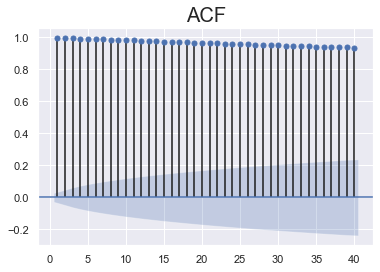

In [74]:
sgt.plot_acf(df_train.market_value,lags=40,zero=False)
plt.title("ACF",size=20)
plt.show()

### PACF of FTSE

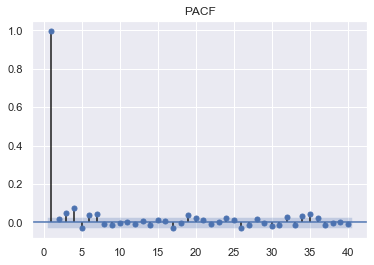

In [75]:
sgt.plot_pacf(df_train.market_value,lags=40,zero=False,method=("ols"))
plt.title("PACF")
plt.show()

### The AR(1) Model

In [70]:
# Import package
from statsmodels.tsa.arima_model import ARMA

In [71]:
model_ar = ARMA(df_train.market_value,order=(1,0))


In [72]:
result_ar = model_ar.fit()

In [73]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Sun, 29 Mar 2020   AIC                          55251.195
Time:                        12:44:00   BIC                          55270.759
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5038.0834    487.182     10.341      0.000    4083.225    5992.942
ar.L1.market_value     0.9985      0.001   1298.634      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [76]:
model_ar_2 = ARMA(df_train.market_value, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Sun, 29 Mar 2020   AIC                          55251.742
Time:                        16:38:31   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    495.684     10.268      0.000    4118.119    6061.164
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4633           +0.0000j           58.4633            0.5000
-----------------------------------------------------------------------------
"""

In [93]:
from scipy.stats.distributions import chi2

In [94]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p